<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/YB_5_30_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [4]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [5]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [6]:
#모델 생성
from sklearn.cluster import KMeans
import pandas as pd

# 예시: 데이터프레임 df가 있다고 가정
# df = pd.read_csv('your_data.csv')  # 데이터 불러오기

# 특징 변수(X) 선택 - 예: df에서 수치형 변수만 사용
X = sales.select_dtypes(include=['float64', 'int64'])

# KMeans 모델 생성 (군집 수 = 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# 모델 학습
kmeans.fit(X)

# 군집 레이블 저장
sales['cluster'] = kmeans.labels_

# 군집화 결과 확인
print(sales['cluster'].value_counts())


cluster
0    61
1    50
2    39
Name: count, dtype: int64


2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [7]:
# 모델 훈련 및 예측치 생성
pred = kmeans.fit_predict(X)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [9]:
# pred는 이전 단계에서 생성한 군집 예측 결과
# scale은 스케일링된 데이터
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale = scaler.fit_transform(sales)

# 예측 결과를 cluster라는 열로 추가
import pandas as pd
scale = pd.DataFrame(scale)
scale['cluster'] = pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [10]:
#scale 데이터프레임에서 'cluster' 열을 제외하고 저장
salesDF = scale.drop(columns=['cluster'])

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [11]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
from sklearn.decomposition import PCA

# PCA 모델 생성 및 학습 (2차원으로 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales = salesDF.copy()  # salesDF 복사해서 sales 생성
sales['pca_x'] = pca_result[:, 0]
sales['pca_y'] = pca_result[:, 1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

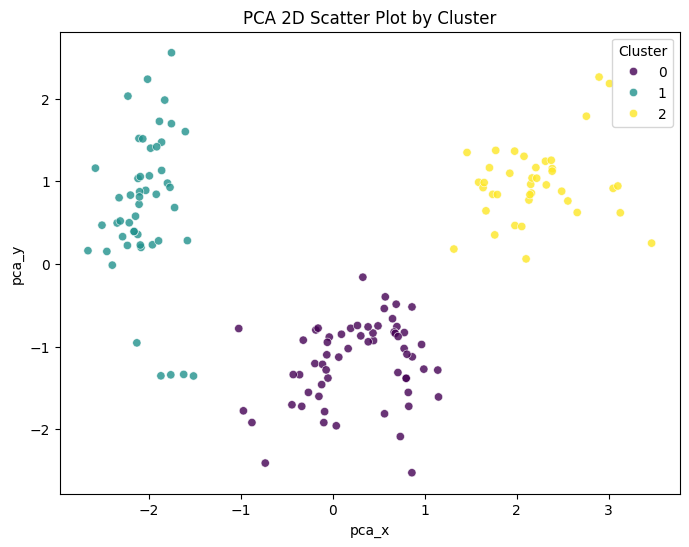

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# cluster 변수가 scale에 있으므로 sales에 추가
sales['cluster'] = scale['cluster']

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=sales,
    x='pca_x', y='pca_y',
    hue='cluster',
    palette='viridis',
    alpha=0.8
)

plt.title('PCA 2D Scatter Plot by Cluster')
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.legend(title='Cluster')
plt.show()


## 4) 군집평가: 실루엣 계수 구하기

In [13]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [16]:
#sales의 모든 데이터에 실루엣 계수 구하기
from sklearn.metrics import silhouette_samples

# 각 샘플에 대한 실루엣 계수 계산
silhouette_vals = silhouette_samples(sales_data, sales['cluster'])
silhouette_vals

array([0.5906485 , 0.65791059, 0.66106403, 0.57094878, 0.66039908,
       0.64012226, 0.49261076, 0.52962503, 0.48095931, 0.64574224,
       0.66623414, 0.61242535, 0.64574224, 0.58677025, 0.67577695,
       0.67348844, 0.27164824, 0.63344799, 0.61000602, 0.58006245,
       0.60019683, 0.61151571, 0.65901557, 0.62187527, 0.68016547,
       0.54449989, 0.52335818, 0.58104536, 0.58954032, 0.61271393,
       0.69639737, 0.61233899, 0.37485538, 0.57893233, 0.57890707,
       0.37153628, 0.67295443, 0.55084274, 0.68237192, 0.59663333,
       0.49893032, 0.65072887, 0.63421451, 0.64644559, 0.61285163,
       0.53691986, 0.69057173, 0.61222503, 0.64666885, 0.63596047,
       0.56100795, 0.51784102, 0.62691376, 0.6937751 , 0.57122334,
       0.57442442, 0.54530794, 0.66799025, 0.66257139, 0.60867416,
       0.46443187, 0.48348736, 0.57997654, 0.61202006, 0.63468038,
       0.64993916, 0.66086958, 0.66962269, 0.39546229, 0.67870709,
       0.61641886, 0.66902506, 0.67483834, 0.2777735 , 0.68206

In [17]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette'] = silhouette_vals

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [18]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
avg_silhouette = sales['silhouette'].mean()

# 결과 출력
print("전체 데이터의 평균 실루엣 계수:", round(avg_silhouette, 4))


전체 데이터의 평균 실루엣 계수: 0.587


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [19]:
#군집별 평균 실루엣 계수 구하기
cluster_silhouette_means = sales.groupby('cluster')['silhouette'].mean()

# 출력
print("군집별 평균 실루엣 계수:")
print(cluster_silhouette_means.round(4))

군집별 평균 실루엣 계수:
cluster
0    0.5877
1    0.5629
2    0.6169
Name: silhouette, dtype: float64
